In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My_Drive"
!google-drive-ocamlfuse "/content/gdrive/My_Drive"

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=OcbCHATOqBv%2FOwIb0168n5VIN%2FizLbUpn7ns4Ppm6Fc'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2F

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/My_Drive/Nuclear_fusion_data/fusion_experiment.csv', low_memory=False)

In [3]:
df.head(5)


,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    100000 non-null  int64  
 1   Magnetic Field Fluctuations   100000 non-null  float64
 2   Leakage                       100000 non-null  float64
 3   Instabilities                 100000 non-null  float64
 4   Plasma Instabilities          100000 non-null  float64
 5   Magnetic Field Strength       100000 non-null  float64
 6   Magnetic Field Configuration  100000 non-null  object 
 7   Injection Energy              100000 non-null  float64
 8   Beam Symmetry                 100000 non-null  float64
 9   Target Density                100000 non-null  float64
 10  Target Composition            100000 non-null  object 
 11  Fuel Density                  100000 non-null  float64
 12  Temperature                   100000 non-null

In [5]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols
from sklearn.preprocessing import LabelEncoder
object_features = ['Magnetic Field Configuration', 'Target Composition']

# Encode the object features
label_encoder = LabelEncoder()
for feature in object_features:
    df[feature] = label_encoder.fit_transform(df[feature])
df

,Unnamed: 0,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0,0.037454,0.058078,0.028259,0.015705,9.000578,2,5.713125,0.800007,2.026963e+19,0,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,1,0.095071,0.052697,0.045868,0.009551,3.841421,0,9.819548,0.082642,3.050685e+19,1,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,2,0.073199,0.035104,0.009922,0.013794,1.467187,1,7.016781,0.176319,5.287388e+19,2,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,3,0.059866,0.049321,0.044684,0.047349,9.277696,2,4.018930,0.833709,5.961305e+19,1,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,4,0.015602,0.036510,0.020308,0.088453,4.926347,0,6.145836,0.808161,7.887942e+19,0,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.079230,0.062215,0.009281,0.075015,6.989681,2,8.363230,0.080241,6.220430e+19,1,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,99996,0.077925,0.062922,0.062563,0.027253,9.904975,0,3.718771,0.977716,3.429971e+19,2,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,99997,0.067445,0.019220,0.062666,0.057559,5.389669,2,8.788397,0.374680,4.750184e+19,2,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,99998,0.049945,0.065308,0.004765,0.089334,6.984881,2,3.024949,0.926179,3.030606e+19,1,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


In [6]:
X= df.drop(['Unnamed: 0'],axis=1)
y= df['Ignition']

# Rest of visualization will be on test set
### because it takes much time on the whole dataset

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

del X
del y

In [8]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train =  label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [9]:

label_encoder.classes_


array([0, 1])

In [10]:
print(type(label_encoder.classes_))

<class 'numpy.ndarray'>


In [11]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X_feat, y_label):
    mi_scores = mutual_info_regression(X_feat, y_label, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_feat.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#mi_scores = make_mi_scores(X_train, y_train)
#mi_scores = make_mi_scores(X_test, y_test)

In [12]:
def plot_utility_scores(scores):
    y_scores = scores.sort_values(ascending=True)
    width = np.arange(len(y_scores))
    ticks = list(y_scores.index)
    plt.barh(width, y_scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


#plt.figure(dpi=100, figsize=(50, 50))
#plt.xlabel("Score")
#plt.ylabel("Feature")
#plot_utility_scores(mi_scores)

In [13]:
from sklearn.manifold import TSNE
import time

In [14]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=10)
#tsne_results = tsne.fit_transform(X_train)
#tsne_results = tsne.fit_transform(X_test)
print('t-SNE: {} seconds'.format(time.time()-time_start))

t-SNE: 0.00014352798461914062 seconds


In [15]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 0.7153075822603719, 1: 1.6611295681063123}

In [ ]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train =  min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
input_shape = X_train.shape[1:]

In [20]:
print(X_train.shape, X_test.shape)
print(input_shape)

(80000, 19, 1) (20000, 19, 1)
(19, 1)


In [21]:
num_classes = len(np.unique(y_train))
num_classes

2

In [22]:
from  tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [23]:
print(y_train.shape, y_test.shape)

(80000, 2) (20000, 2)


In [24]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sn
from sklearn.preprocessing import LabelEncoder

In [25]:
def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(20, 20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(label_encoder.classes_[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn
target= label_encoder.classes_.tolist()
target = list(map(str, target))
def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall: ", recall_score(y_real, y_pred, average="micro"))
    print("F1 Score: ", f1_score(y_real, y_pred))
    print()
    print("Macro Precision, Recall, F1 Score, and Support (macro average)")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))
    print()
    print("Macro Precision, Recall, F1 Score, and Support (micro average)")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))
    print()
    print("Macro Precision, Recall, F1 Score, and Support (weighted average)")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))

    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in label_encoder.classes_],
        columns=[i for i in label_encoder.classes_],
    )
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)
    plt.show()

    print()
    print("Classification Report")
    print(

        classification_report(
            y_real, y_pred, target_names=target
        )
    )


In [27]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [29]:
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv1D(filters=F1, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2, kernel_size=f, strides=1, padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3, kernel_size=1, strides=1, padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name=bn_name_base + '2c')(X)

    X_shortcut = Conv1D(filters=F3, kernel_size=1, strides=s, padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [30]:
def ResNet50(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding1D((3, 3))(X_input)

    X = Conv1D(filters=64, kernel_size=7, strides=2, name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(pool_size=3, strides=2)(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling1D(pool_size=2, padding='same')(X)
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [31]:
from keras.metrics import Recall, Precision
import tensorflow as tf

def build_model(num_classes, input_shape=(19,1)):
    base_model = ResNet50(input_shape=input_shape)
    headModel = base_model.output
    headModel = Flatten()(headModel)
    headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
    headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
    headModel = Dense(num_classes, activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)
    model = Model(inputs=base_model.input, outputs=headModel)
    opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss= tf.keras.metrics.categorical_crossentropy,
                  metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
    return model

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Input, ZeroPadding1D
from tensorflow.keras.layers import MaxPooling1D, Add, AveragePooling1D
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam

model = build_model(num_classes, input_shape=input_shape)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19, 1)]      0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 25, 1)       0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv1D)                 (None, 10, 64)       512         ['zero_padding1d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 10, 64)       256         ['conv1[0][0]']                  
                                                                                              

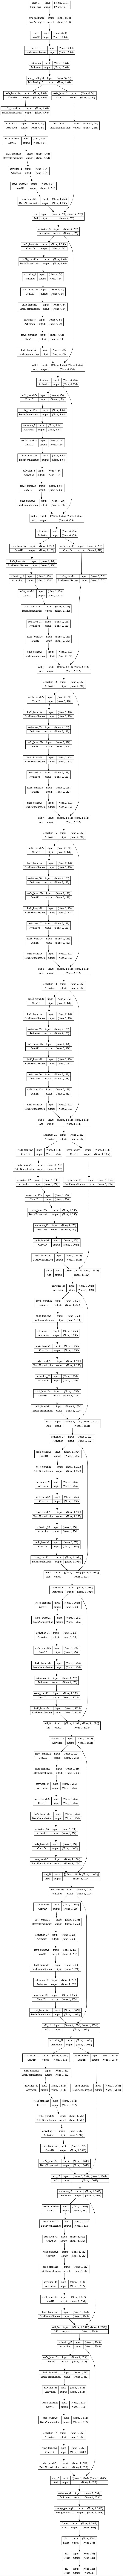

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file="model_fig.jpg", show_shapes=True)

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras


model_weights_file_path = "model_best_weights.h5"
checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_loss", verbose=1, save_best_only=True, mode="min", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, mode="min", verbose=1, min_lr=0)
plotlosses = PlotLossesKeras()

call_backs = [checkpoint, early_stopping, lr_reduce, plotlosses]

In [34]:
print(y_train.shape)

(80000, 2)


In [35]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
EPOCHS = 10
BATCH_SIZE = 256
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=call_backs,
                    class_weight=class_weights,
                    verbose=1)


# Validation Results

In [37]:
y_hat = model.predict(X_test)

625/625 [==============================] - 19s 28ms/step


In [38]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

In [39]:
y_true_ohe = to_categorical(y_true, num_classes=num_classes)
y_hat_ohe =  to_categorical(y_hat, num_classes=num_classes)

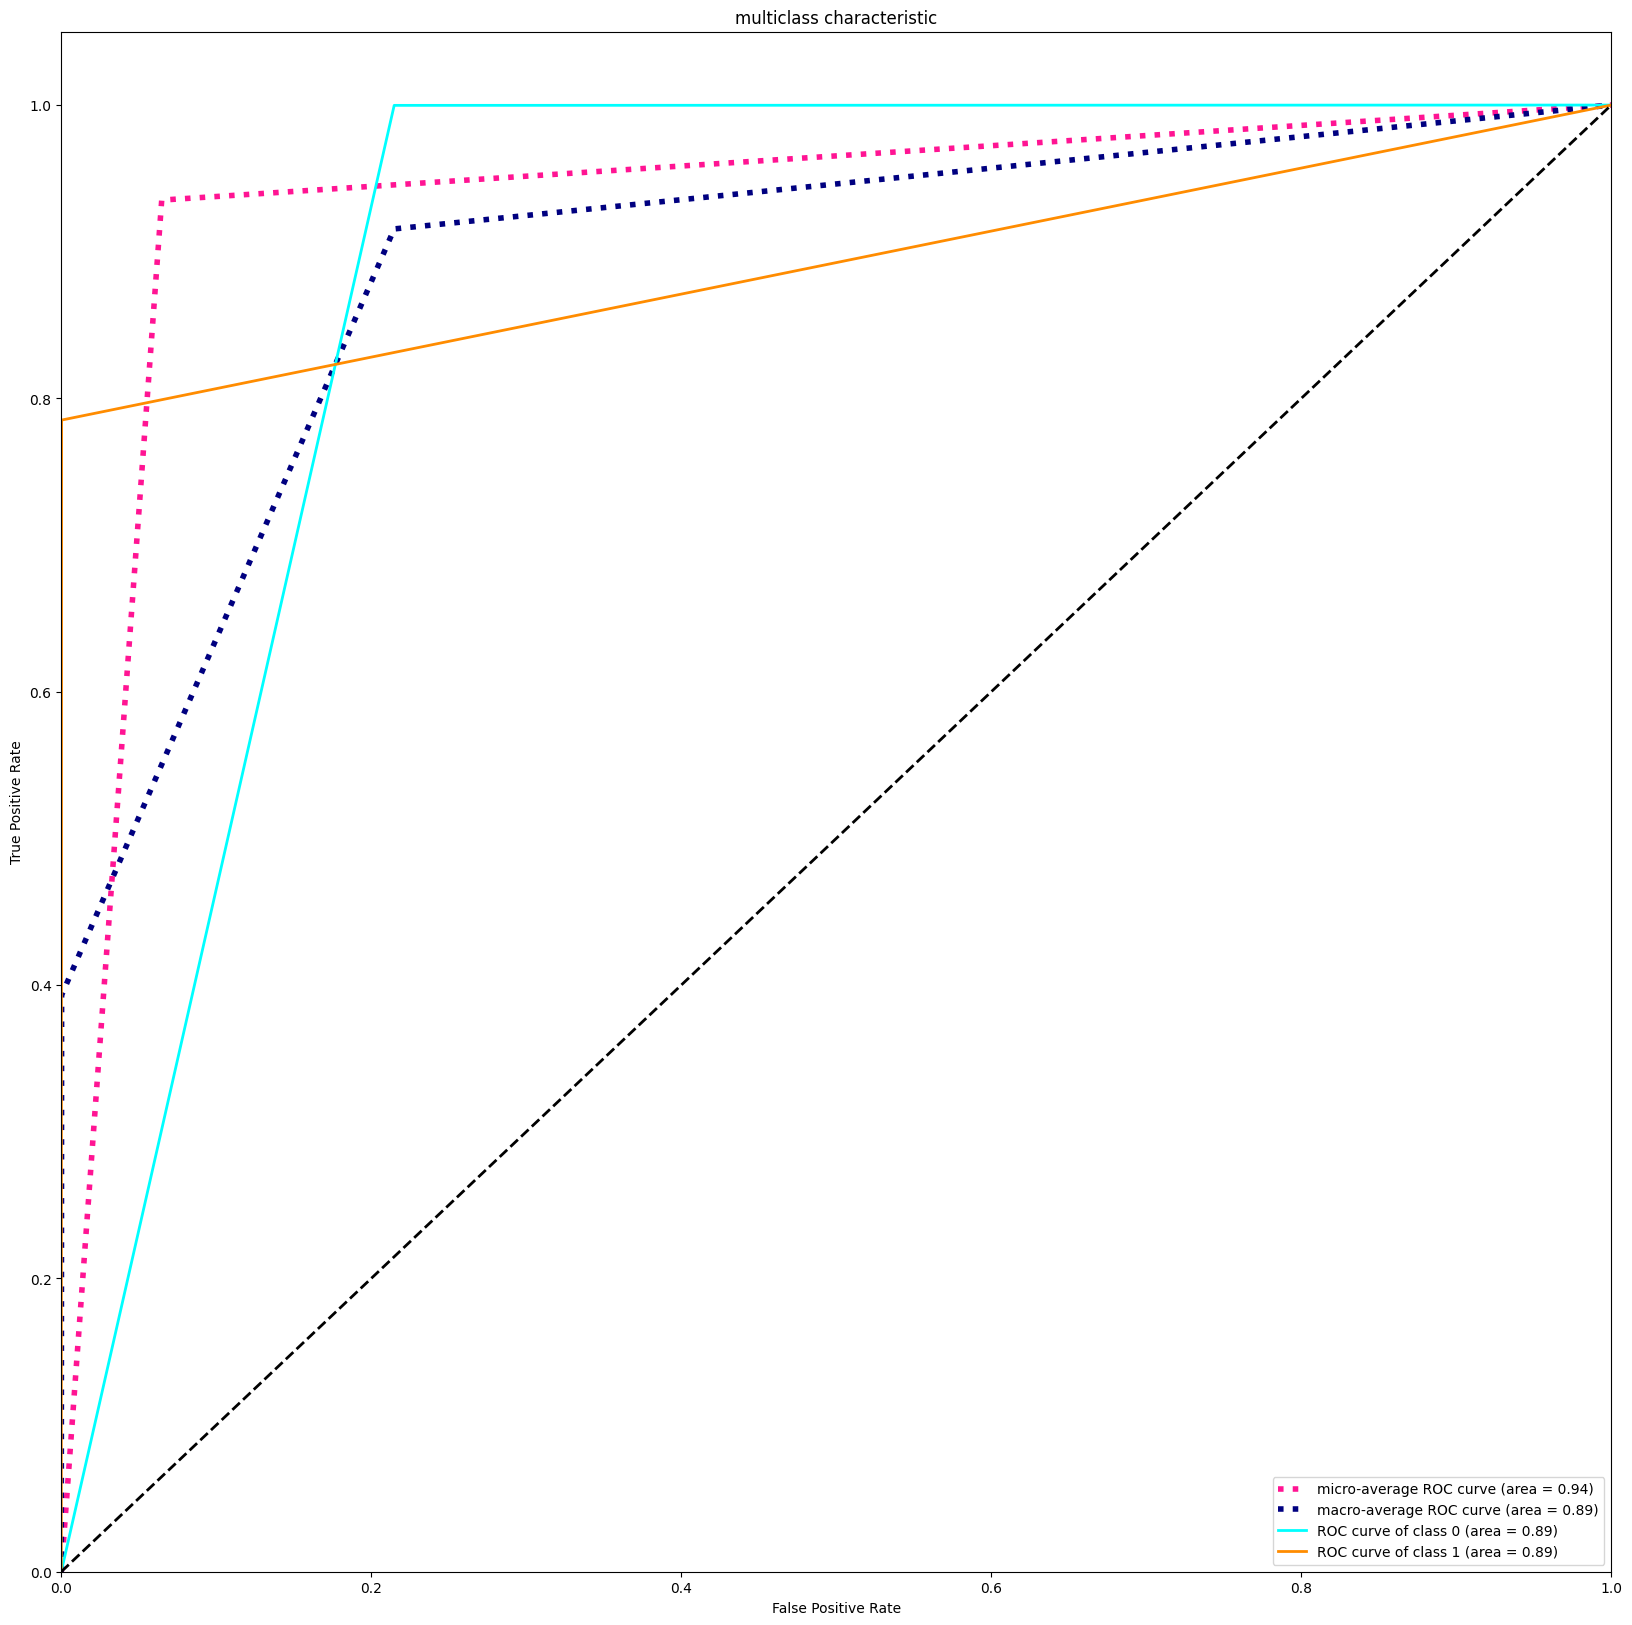

In [40]:
ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, num_classes)

Accuracy:  0.9352
Precision:  0.9352
Recall:  0.9352
F1 Score:  0.8794418604651163

Macro Precision, Recall, F1 Score, and Support (macro average)
(0.9573449577790054, 0.8925006772845878, 0.917567084078712, None)

Macro Precision, Recall, F1 Score, and Support (micro average)
(0.9352, 0.9352, 0.9352, None)

Macro Precision, Recall, F1 Score, and Support (weighted average)
(0.9406206822646902, 0.9352, 0.932740923076923, None)

Confusion Matrix


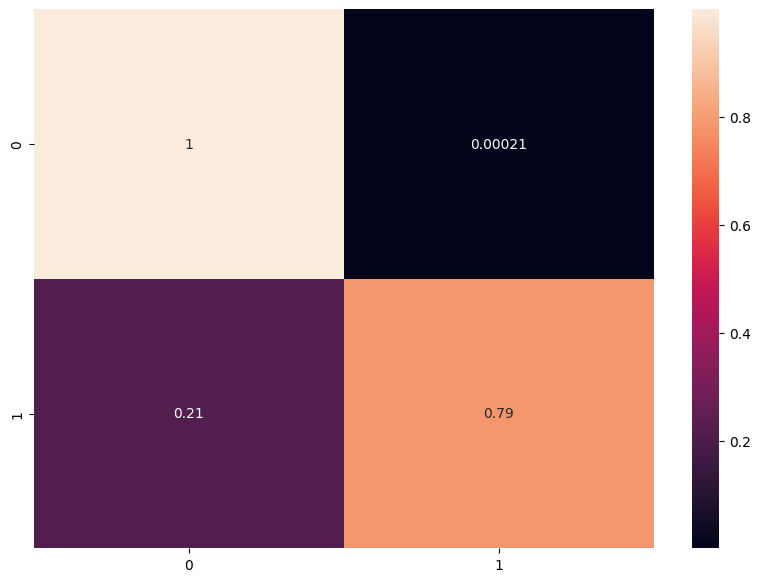


Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13980
           1       1.00      0.79      0.88      6020

    accuracy                           0.94     20000
   macro avg       0.96      0.89      0.92     20000
weighted avg       0.94      0.94      0.93     20000



In [41]:
print_score(y_hat, y_true, label_encoder)